# 1. Language Processing and Python

It is easy to get our hands on millions of words of text. What can we do with it, assuming we can write some simple programs? In this chapter we'll address the following questions:

1. What can we achieve by combining simple programming techniques with large quantities of text?
2.    How can we automatically extract key words and phrases that sum up the style and content of a text?
3.    What tools and techniques does the Python programming language provide for such work?
4.    What are some of the interesting challenges of natural language processing?

This chapter is divided into sections that skip between two quite different styles. In the "computing with language" sections we will take on some linguistically motivated programming tasks without necessarily explaining how they work. In the "closer look at Python" sections we will systematically review key programming concepts. We'll flag the two styles in the section titles, but later chapters will mix both styles without being so up-front about it. We hope this style of introduction gives you an authentic taste of what will come later, while covering a range of elementary concepts in linguistics and computer science. If you have basic familiarity with both areas, you can skip to 5; we will repeat any important points in later chapters, and if you miss anything you can easily consult the online reference material at http://nltk.org/. If the material is completely new to you, this chapter will raise more questions than it answers, questions that are addressed in the rest of this book.

## 1   Computing with Language: Texts and Words

We're all very familiar with text, since we read and write it every day. Here we will treat text as raw data for the programs we write, programs that manipulate and analyze it in a variety of interesting ways. But before we can do this, we have to get started with the Python interpreter.

### 1.1   Getting Started with Python

One of the friendly things about Python is that it allows you to type directly into the interactive interpreter — the program that will be running your Python programs. You can access the Python interpreter using a simple graphical interface called the Interactive DeveLopment Environment (IDLE). On a Mac you can find this under Applications→MacPython, and on Windows under All Programs→Python. Under Unix you can run Python from the shell by typing idle (if this is not installed, try typing python). The interpreter will print a blurb about your Python version; simply check that you are running Python 3.2 or later (here it is for 3.4.2):

In [2]:
import sys
print (sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


### Note

If you are unable to run the Python interpreter, you probably don't have Python installed correctly. Please visit http://python.org/ for detailed instructions. NLTK 3.0 works for Python 2.6 and 2.7. If you are using one of these older versions, note that the / operator rounds fractional results downwards (so 1/3 will give you 0). In order to get the expected behavior of division you need to type: from __future__ import division

In [3]:
1 + 5 * 2 - 3

8

### 1.2   Getting Started with NLTK

Before going further you should install NLTK 3.0, downloadable for free from http://nltk.org/. Follow the instructions there to download the version required for your platform.

Once you've installed NLTK, start up the Python interpreter as before, and install the data required for the book by typing the following two commands at the Python prompt, then selecting the book collection as shown in 1.1.


In [4]:
import nltk

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

![fig1](images/nltk-downloader.png)

Figure 1.1: Downloading the NLTK Book Collection: browse the available packages using nltk.download(). The Collections tab on the downloader shows how the packages are grouped into sets, and you should select the line labeled book to obtain all data required for the examples and exercises in this book. It consists of about 30 compressed files requiring about 100Mb disk space. The full collection of data (i.e., all in the downloader) is nearly ten times this size (at the time of writing) and continues to expand.

Once the data is downloaded to your machine, you can load some of it using the Python interpreter. The first step is to type a special command at the Python prompt which tells the interpreter to load some texts for us to explore: from nltk.book import *. This says "from NLTK's book module, load all items." The book module contains all the data you will need as you read this chapter. After printing a welcome message, it loads the text of several books (this will take a few seconds). Here's the command again, together with the output that you will see.

In [6]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Any time we want to find out about these texts, we just have to enter their names at the Python prompt:

In [7]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [8]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

Now that we can use the Python interpreter, and have some data to work with, we're ready to get started.

### 1.3   Searching Text

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word monstrous in Moby Dick by entering text1 followed by a period, then the term concordance, and then placing "monstrous" in parentheses:

In [9]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


**Note**

Your Turn: Try searching for other words; to save re-typing, you might be able to use up-arrow, Ctrl-up-arrow or Alt-p to access the previous command and modify the word being searched. You can also try searches on some of the other texts we have included. For example, search Sense and Sensibility for the word affection, using text2.concordance("affection"). Search the book of Genesis to find out how long some people lived, using text3.concordance("lived"). You could look at text4, the Inaugural Address Corpus, to see examples of English going back to 1789, and search for words like nation, terror, god to see how these words have been used differently over time. We've also included text5, the NPS Chat Corpus: search this for unconventional words like im, ur, lol. (Note that this corpus is uncensored!)

Once you've spent a little while examining these texts, we hope you have a new sense of the richness and diversity of language. In the next chapter you will learn how to access a broader range of text, including text in languages other than English.

A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as `the ___ pictures and a ___ size`. What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [17]:
print ('Title: ', text1.name)
text1.similar('monstrous')

Title:  Moby Dick by Herman Melville 1851
true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [18]:
print (text2.name)
text2.similar('monstrous')

Sense and Sensibility by Jane Austen 1811
very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, _monstrous_ has positive connotations, and sometimes functions as an intensifier like the word very.

The term `common_contexts` allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [19]:
text2.common_contexts (['monstrous', 'very'])

a_pretty am_glad a_lucky is_pretty be_glad


**Note**

Your Turn: Pick another pair of words and compare their usage in two different texts, using the similar() and common_contexts() functions.

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a **dispersion plot**. 

Each stripe represents an instance of a word, and each row represents the entire text. In 1.2 we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parentheses exactly right.

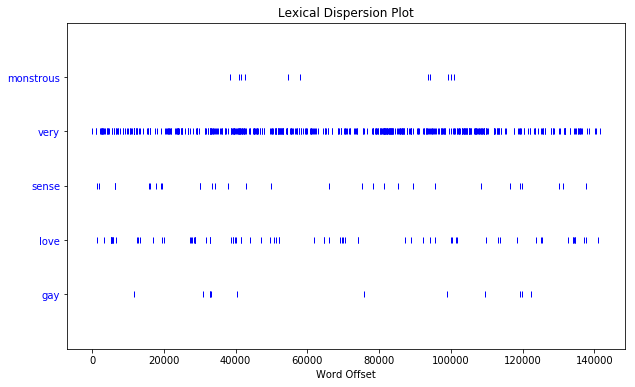

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

text2.dispersion_plot(['monstrous', 'very', 'sense', 'love', 'gay'])

Inaugural Address Corpus


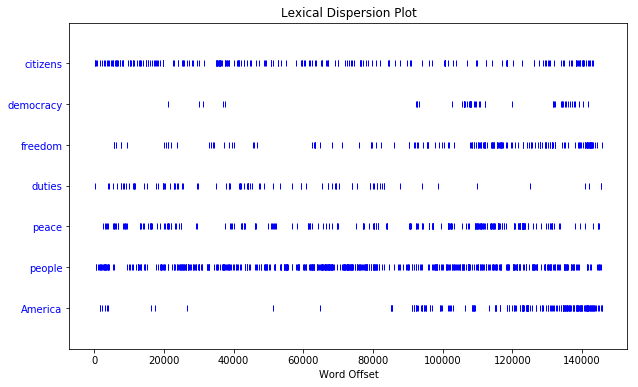

In [30]:
print(text4.name)
text4.dispersion_plot(['citizens', 'democracy', 'freedom', 'duties', 'peace', 'people', 'America'])

**Note**

Important: You need to have Python's NumPy and Matplotlib packages installed in order to produce the graphical plots used in this book. Please see http://nltk.org/ for installation instructions.

**Note**

You can also plot the frequency of word usage through time using https://books.google.com/ngrams

Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term generate. (We need to include the parentheses, but there's nothing that goes between them.)

In [36]:
print (text3.name)
text3.generate('x')

The Book of Genesis


**Note**

The generate() method is not available in NLTK 3.0 but will be reinstated in a subsequent version.

### 1.4   Counting Vocabulary

The most obvious fact about texts that emerges from the preceding examples is that they differ in the vocabulary they use. In this section we will see how to use the computer to count the words in a text in a variety of useful ways. As before, you will jump right in and experiment with the Python interpreter, even though you may not have studied Python systematically yet. Test your understanding by modifying the examples, and trying the exercises at the end of the chapter.

Let's begin by finding out the length of a text from start to finish, in terms of the words and punctuation symbols that appear. We use the term len to get the length of something, which we'll apply here to the book of Genesis:

In [40]:
print (text3.name, ' has ', len(text3), ' words')

The Book of Genesis  has  44764  words


So Genesis has 44,764 words and punctuation symbols, or "tokens." A **token** is the technical name for a sequence of characters — such as hairy, his, or :) — that we want to treat as a group. When we count the number of tokens in a text, say, the phrase to be or not to be, we are counting occurrences of these sequences. Thus, in our example phrase there are two occurrences of to, two of be, and one each of or and not. But there are only four distinct vocabulary items in this phrase. How many distinct words does the book of Genesis contain? To work this out in Python, we have to pose the question slightly differently. The vocabulary of a text is just the set of tokens that it uses, since in a set, all duplicates are collapsed together. In Python we can obtain the vocabulary items of `text3` with the command: `set(text3)`. When you do this, many screens of words will fly past. Now try the following:

In [48]:
out = sorted(set(text3))
print(len(out), out[:25])

2789 ['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';', ';)', '?', '?)', 'A', 'Abel', 'Abelmizraim', 'Abidah', 'Abide', 'Abimael', 'Abimelech', 'Abr', 'Abrah', 'Abraham', 'Abram', 'Accad']


By wrapping sorted() around the Python expression set(text3) [1], we obtain a sorted list of vocabulary items, beginning with various punctuation symbols and continuing with words starting with A. All capitalized words precede lowercase words. We discover the size of the vocabulary indirectly, by asking for the number of items in the set, and again we can use len to obtain this number [2]. Although it has 44,764 tokens, this book has only 2,789 distinct words, or "word types." A word type is the form or spelling of the word independently of its specific occurrences in a text — that is, the word considered as a unique item of vocabulary. Our count of 2,789 items will include punctuation symbols, so we will generally call these unique items types instead of word types.

Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average (remember if you're using Python 2, to start with from __future__ import division).

In [49]:
len(set(text3)) / len(text3)

0.06230453042623537

Next, let's focus on particular words. We can count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word:

In [50]:
print (text3.name)
text3.count ('smote')

The Book of Genesis


5

In [52]:
100 * text4.count('a') / len(text4)

1.4643016433938312

**Note**

Your Turn: How many times does the word lol appear in text5? How much is this as a percentage of the total number of words in this text?

In [53]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

**Caution!**

The Python interpreter changes the prompt from >>> to ... after encountering the colon at the end of the first line. The ... prompt indicates that Python expects an indented code block to appear next. It is up to you to do the indentation, by typing four spaces or hitting the tab key. To finish the indented block just enter a blank line.

In the definition of `lexical_diversity()` [1], we specify a **parameter** named text . This parameter is a "placeholder" for the actual text whose lexical diversity we want to compute, and reoccurs in the block of code that will run when the function is used [2]. Similarly, percentage() is defined to take two parameters, named count and total [3].

Once Python knows that `lexical_diversity()` and `percentage()` are the names for specific blocks of code, we can go ahead and use these functions:

In [55]:
lexical_diversity(text3)

0.06230453042623537

In [56]:
lexical_diversity(text5)

0.13477005109975562

In [57]:
percentage(4, 5)

80.0

In [58]:
percentage(text4.count('a'), len(text4))

1.4643016433938312

To recap, we use or call a function such as lexical_diversity() by typing its name, followed by an open parenthesis, the name of the text, and then a close parenthesis. These parentheses will show up often; their role is to separate the name of a task — such as lexical_diversity() — from the data that the task is to be performed on — such as text3. The data value that we place in the parentheses when we call a function is an argument to the function.

You have already encountered several functions in this chapter, such as len(), set(), and sorted(). By convention, we will always add an empty pair of parentheses after a function name, as in len(), just to make clear that what we are talking about is a function rather than some other kind of Python expression. Functions are an important concept in programming, and we only mention them at the outset to give newcomers a sense of the power and creativity of programming. Don't worry if you find it a bit confusing right now.

Later we'll see how to use functions when tabulating data, as in 1.1. Each row of the table will involve the same computation but with different data, and we'll do this repetitive work using a function.

Table 1.1:

Lexical Diversity of Various Genres in the Brown Corpus

Genre 	Tokens 	Types 	Lexical diversity
skill and hobbies 	82345 	11935 	0.145
humor 	21695 	5017 	0.231
fiction: science 	14470 	3233 	0.223
press: reportage 	100554 	14394 	0.143
fiction: romance 	70022 	8452 	0.121
religion 	39399 	6373 	0.162


## 2   A Closer Look at Python: Texts as Lists of Words

You've seen some important elements of the Python programming language. Let's take a few moments to review them systematically.

### 2.1   Lists

What is a text? At one level, it is a sequence of symbols on a page such as this one. At another level, it is a sequence of chapters, made up of a sequence of sections, where each section is a sequence of paragraphs, and so on. However, for our purposes, we will think of a text as nothing more than a sequence of words and punctuation. Here's how we represent text in Python, in this case the opening sentence of Moby Dick:

In [59]:
sent1 = ['Call', 'me', 'Ishmael', '.']

After the prompt we've given a name we made up, sent1, followed by the equals sign, and then some quoted words, separated with commas, and surrounded with brackets. This bracketed material is known as a list in Python: it is how we store a text. We can inspect it by typing the name [1]. We can ask for its length [2]. We can even apply our own `lexical_diversity()` function to it [3].

In [61]:
print (len(sent1), lexical_diversity (sent1))

4 1.0


Some more lists have been defined for you, one for the opening sentence of each of our texts, sent2 … sent9. We inspect two of them here; you can see the rest for yourself using the Python interpreter (if you get an error which says that sent2 is not defined, you need to first type from nltk.book import *).

In [63]:
print (sent2)

['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'settled', 'in', 'Sussex', '.']


In [64]:
sent3

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

**Note**

Your Turn: Make up a few sentences of your own, by typing a name, equals sign, and a list of words, like this: ex1 = ['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']. Repeat some of the other Python operations we saw earlier in 1, e.g., sorted(ex1), len(set(ex1)), ex1.count('the').

A pleasant surprise is that we can use Python's addition operator on lists. Adding two lists [1] creates a new list with everything from the first list, followed by everything from the second list:

In [65]:
['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail']

['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']

Note

This special use of the addition operation is called concatenation; it combines the lists together into a single list. We can concatenate sentences to build up a text.

We don't have to literally type the lists either; we can use short names that refer to pre-defined lists.

In [68]:
print ('sent4: ', sent4, '\nsent1: ', sent1, '\nsent4+sent1: ', sent4 + sent1)

sent4:  ['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'] 
sent1:  ['Call', 'me', 'Ishmael', '.'] 
sent4+sent1:  ['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':', 'Call', 'me', 'Ishmael', '.']


What if we want to add a single item to a list? This is known as appending. When we `append()` to a list, the list itself is updated as a result of the operation.

In [71]:
sent1.append("Some")
print (type(sent1), sent1)

<class 'list'> ['Call', 'me', 'Ishmael', '.', 'Some', 'Some', 'Some']


### 2.2   Indexing Lists

As we have seen, a text in Python is a list of words, represented using a combination of brackets and quotes. Just as with an ordinary page of text, we can count up the total number of words in text1 with `len(text1)`, and count the occurrences in a text of a particular word — say, 'heaven' — using `text1.count('heaven')`.

With some patience, we can pick out the 1st, 173rd, or even 14,278th word in a printed text. Analogously, we can identify the elements of a Python list by their order of occurrence in the list. The number that represents this position is the item's index. We instruct Python to show us the item that occurs at an index such as 173 in a text by writing the name of the text followed by the index inside square brackets:

In [73]:
text4[173]

'awaken'

We can do the converse; given a word, find the index of when it first occurs:

In [74]:
text4.index('awaken')

173

Indexes are a common way to access the words of a text, or, more generally, the elements of any list. Python permits us to access sublists as well, extracting manageable pieces of language from large texts, a technique known as **slicing**.

In [76]:
print(text5[16715:16735])

['U86', 'thats', 'why', 'something', 'like', 'gamefly', 'is', 'so', 'good', 'because', 'you', 'can', 'actually', 'play', 'a', 'full', 'game', 'without', 'buying', 'it']


In [77]:
text6[1600:1625]

['We',
 "'",
 're',
 'an',
 'anarcho',
 '-',
 'syndicalist',
 'commune',
 '.',
 'We',
 'take',
 'it',
 'in',
 'turns',
 'to',
 'act',
 'as',
 'a',
 'sort',
 'of',
 'executive',
 'officer',
 'for',
 'the',
 'week']

Indexes have some subtleties, and we'll explore these with the help of an artificial sentence:

In [78]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9', 'word10']

In [81]:
print (sent[0], sent[9])

word1 word10


Notice that our indexes start from zero: sent element zero, written `sent[0]`, is the first word, 'word1', whereas sent element 9 is 'word10'. The reason is simple: the moment Python accesses the content of a list from the computer's memory, it is already at the first element; we have to tell it how many elements forward to go. Thus, zero steps forward leaves it at the first element.

Note

This practice of counting from zero is initially confusing, but typical of modern programming languages. You'll quickly get the hang of it if you've mastered the system of counting centuries where 19XY is a year in the 20th century, or if you live in a country where the floors of a building are numbered from 1, and so walking up n-1 flights of stairs takes you to level n.

Now, if we accidentally use an index that is too large, we get an error:

In [80]:
sent[10]

IndexError: list index out of range

This time it is not a syntax error, because the program fragment is syntactically correct. Instead, it is a runtime error, and it produces a Traceback message that shows the context of the error, followed by the name of the error, IndexError, and a brief explanation.

Let's take a closer look at slicing, using our artificial sentence again. Here we verify that the slice 5:8 includes sent elements at indexes 5, 6, and 7:

In [82]:
sent[5:8]

['word6', 'word7', 'word8']

In [83]:
sent[5]

'word6'

In [84]:
sent[7]

'word8'

By convention, m:n means elements m…n-1. As the next example shows, we can omit the first number if the slice begins at the start of the list [1], and we can omit the second number if the slice goes to the end [2]:

In [85]:
sent[:3]

['word1', 'word2', 'word3']

In [87]:
print(text2[141525:])

['among', 'the', 'merits', 'and', 'the', 'happiness', 'of', 'Elinor', 'and', 'Marianne', ',', 'let', 'it', 'not', 'be', 'ranked', 'as', 'the', 'least', 'considerable', ',', 'that', 'though', 'sisters', ',', 'and', 'living', 'almost', 'within', 'sight', 'of', 'each', 'other', ',', 'they', 'could', 'live', 'without', 'disagreement', 'between', 'themselves', ',', 'or', 'producing', 'coolness', 'between', 'their', 'husbands', '.', 'THE', 'END']


We can modify an element of a list by assigning to one of its index values. In the next example, we put sent[0] on the left of the equals sign [1]. We can also replace an entire slice with new material [2]. A consequence of this last change is that the list only has four elements, and accessing a later value generates an error [3].

In [89]:
sent[0] = 'First'

In [90]:
sent[9] = 'Last'

In [91]:
len(sent)

10

In [93]:
sent[1:9] = ['Second', 'Third']

In [94]:
sent

['First', 'Second', 'Third', 'Last']

In [95]:
sent[9]

IndexError: list index out of range

In [96]:
fdist1 = FreqDist (text1)

In [98]:
print(fdist1.most_common (50))

[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024), ('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982), ("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124), ('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632), ('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280), ('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103), ('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005), ('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767), ('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680), ('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]


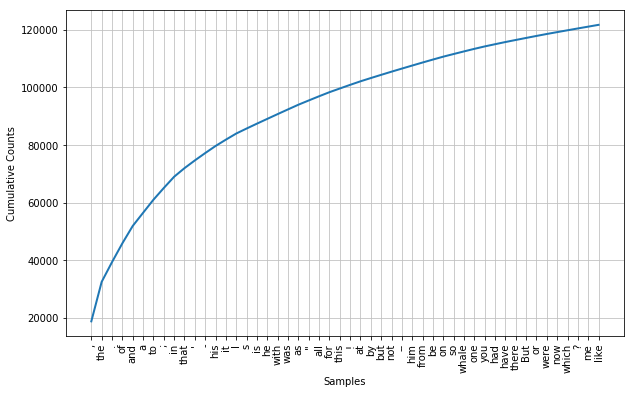

In [99]:
fdist1.plot (50, cumulative=True)

In [102]:
print(len(fdist1.hapaxes()))

9002


Note

Your Turn: Take a few minutes to define a sentence of your own and modify individual words and groups of words (slices) using the same methods used earlier. Check your understanding by trying the exercises on lists at the end of this chapter.
2.3   Variables

From the start of 1, you have had access to texts called text1, text2, and so on. It saved a lot of typing to be able to refer to a 250,000-word book with a short name like this! In general, we can make up names for anything we care to calculate. We did this ourselves in the previous sections, e.g., defining a variable sent1, as follows:
  	

>>> sent1 = ['Call', 'me', 'Ishmael', '.']
>>>

Such lines have the form: variable = expression. Python will evaluate the expression, and save its result to the variable. This process is called assignment. It does not generate any output; you have to type the variable on a line of its own to inspect its contents. The equals sign is slightly misleading, since information is moving from the right side to the left. It might help to think of it as a left-arrow. The name of the variable can be anything you like, e.g., my_sent, sentence, xyzzy. It must start with a letter, and can include numbers and underscores. Here are some examples of variables and assignments:
  	

>>> my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode',
... 'forth', 'from', 'Camelot', '.']
>>> noun_phrase = my_sent[1:4]
>>> noun_phrase
['bold', 'Sir', 'Robin']
>>> wOrDs = sorted(noun_phrase)
>>> wOrDs
['Robin', 'Sir', 'bold']
>>>

Remember that capitalized words appear before lowercase words in sorted lists.

Note

Notice in the previous example that we split the definition of my_sent over two lines. Python expressions can be split across multiple lines, so long as this happens within any kind of brackets. Python uses the "..." prompt to indicate that more input is expected. It doesn't matter how much indentation is used in these continuation lines, but some indentation usually makes them easier to read.

It is good to choose meaningful variable names to remind you — and to help anyone else who reads your Python code — what your code is meant to do. Python does not try to make sense of the names; it blindly follows your instructions, and does not object if you do something confusing, such as one = 'two' or two = 3. The only restriction is that a variable name cannot be any of Python's reserved words, such as def, if, not, and import. If you use a reserved word, Python will produce a syntax error:
  	

>>> not = 'Camelot'           
File "<stdin>", line 1
    not = 'Camelot'
        ^
SyntaxError: invalid syntax
>>>

We will often use variables to hold intermediate steps of a computation, especially when this makes the code easier to follow. Thus len(set(text1)) could also be written:
  	

>>> vocab = set(text1)
>>> vocab_size = len(vocab)
>>> vocab_size
19317
>>>

Caution!

Take care with your choice of names (or identifiers) for Python variables. First, you should start the name with a letter, optionally followed by digits (0 to 9) or letters. Thus, abc23 is fine, but 23abc will cause a syntax error. Names are case-sensitive, which means that myVar and myvar are distinct variables. Variable names cannot contain whitespace, but you can separate words using an underscore, e.g., my_var. Be careful not to insert a hyphen instead of an underscore: my-var is wrong, since Python interprets the "-" as a minus sign.
2.4   Strings

Some of the methods we used to access the elements of a list also work with individual words, or strings. For example, we can assign a string to a variable [1], index a string [2], and slice a string [3]:
  	

>>> name = 'Monty' [1]
>>> name[0] [2]
'M'
>>> name[:4] [3]
'Mont'
>>>

We can also perform multiplication and addition with strings:
  	

>>> name * 2
'MontyMonty'
>>> name + '!'
'Monty!'
>>>

We can join the words of a list to make a single string, or split a string into a list, as follows:
  	

>>> ' '.join(['Monty', 'Python'])
'Monty Python'
>>> 'Monty Python'.split()
['Monty', 'Python']
>>>

We will come back to the topic of strings in 3. For the time being, we have two important building blocks — lists and strings — and are ready to get back to some language analysis.
3   Computing with Language: Simple Statistics

Let's return to our exploration of the ways we can bring our computational resources to bear on large quantities of text. We began this discussion in 1, and saw how to search for words in context, how to compile the vocabulary of a text, how to generate random text in the same style, and so on.

In this section we pick up the question of what makes a text distinct, and use automatic methods to find characteristic words and expressions of a text. As in 1, you can try new features of the Python language by copying them into the interpreter, and you'll learn about these features systematically in the following section.

Before continuing further, you might like to check your understanding of the last section by predicting the output of the following code. You can use the interpreter to check whether you got it right. If you're not sure how to do this task, it would be a good idea to review the previous section before continuing further.
  	

>>> saying = ['After', 'all', 'is', 'said', 'and', 'done',
...           'more', 'is', 'said', 'than', 'done']
>>> tokens = set(saying)
>>> tokens = sorted(tokens)
>>> tokens[-2:]
what output do you expect here?
>>>

3.1   Frequency Distributions

How can we automatically identify the words of a text that are most informative about the topic and genre of the text? Imagine how you might go about finding the 50 most frequent words of a book. One method would be to keep a tally for each vocabulary item, like that shown in 3.1. The tally would need thousands of rows, and it would be an exceedingly laborious process — so laborious that we would rather assign the task to a machine.
../images/tally.png

Figure 3.1: Counting Words Appearing in a Text (a frequency distribution)

The table in 3.1 is known as a frequency distribution, and it tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of Moby Dick:
  	

>>> fdist1 = FreqDist(text1) [1]
>>> print(fdist1) [2]
<FreqDist with 19317 samples and 260819 outcomes>
>>> fdist1.most_common(50) [3]
[(',', 18713), ('the', 13721), ('.', 6862), ('of', 6536), ('and', 6024),
('a', 4569), ('to', 4542), (';', 4072), ('in', 3916), ('that', 2982),
("'", 2684), ('-', 2552), ('his', 2459), ('it', 2209), ('I', 2124),
('s', 1739), ('is', 1695), ('he', 1661), ('with', 1659), ('was', 1632),
('as', 1620), ('"', 1478), ('all', 1462), ('for', 1414), ('this', 1280),
('!', 1269), ('at', 1231), ('by', 1137), ('but', 1113), ('not', 1103),
('--', 1070), ('him', 1058), ('from', 1052), ('be', 1030), ('on', 1005),
('so', 918), ('whale', 906), ('one', 889), ('you', 841), ('had', 767),
('have', 760), ('there', 715), ('But', 705), ('or', 697), ('were', 680),
('now', 646), ('which', 640), ('?', 637), ('me', 627), ('like', 624)]
>>> fdist1['whale']
906
>>>

When we first invoke FreqDist, we pass the name of the text as an argument [1]. We can inspect the total number of words ("outcomes") that have been counted up [2] — 260,819 in the case of Moby Dick. The expression most_common(50) gives us a list of the 50 most frequently occurring types in the text [3].

Note

Your Turn: Try the preceding frequency distribution example for yourself, for text2. Be careful to use the correct parentheses and uppercase letters. If you get an error message NameError: name 'FreqDist' is not defined, you need to start your work with from nltk.book import *

Do any words produced in the last example help us grasp the topic or genre of this text? Only one word, whale, is slightly informative! It occurs over 900 times. The rest of the words tell us nothing about the text; they're just English "plumbing." What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words, using fdist1.plot(50, cumulative=True), to produce the graph in 3.2. These 50 words account for nearly half the book!
../images/fdist-moby.png

Figure 3.2: Cumulative Frequency Plot for 50 Most Frequently Words in Moby Dick: these account for nearly half of the tokens.

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing fdist1.hapaxes(). This list contains lexicographer, cetological, contraband, expostulations, and about 9,000 others. It seems that there are too many rare words, and without seeing the context we probably can't guess what half of the hapaxes mean in any case! Since neither frequent nor infrequent words help, we need to try something else.
3.2   Fine-grained Selection of Words

Next, let's look at the long words of a text; perhaps these will be more characteristic and informative. For this we adapt some notation from set theory. We would like to find the words from the vocabulary of the text that are more than 15 characters long. Let's call this property P, so that P(w) is true if and only if w is more than 15 characters long. Now we can express the words of interest using mathematical set notation as shown in (1a). This means "the set of all w such that w is an element of V (the vocabulary) and w has property P".

(1)		

a.		{w | w ∈ V & P(w)}

b.		[w for w in V if p(w)]

The corresponding Python expression is given in (1b). (Note that it produces a list, not a set, which means that duplicates are possible.) Observe how similar the two notations are. Let's go one more step and write executable Python code:
  	

>>> V = set(text1)
>>> long_words = [w for w in V if len(w) > 15]
>>> sorted(long_words)
['CIRCUMNAVIGATION', 'Physiognomically', 'apprehensiveness', 'cannibalistically',
'characteristically', 'circumnavigating', 'circumnavigation', 'circumnavigations',
'comprehensiveness', 'hermaphroditical', 'indiscriminately', 'indispensableness',
'irresistibleness', 'physiognomically', 'preternaturalness', 'responsibilities',
'simultaneousness', 'subterraneousness', 'supernaturalness', 'superstitiousness',
'uncomfortableness', 'uncompromisedness', 'undiscriminating', 'uninterpenetratingly']
>>>

For each word w in the vocabulary V, we check whether len(w) is greater than 15; all other words will be ignored. We will discuss this syntax more carefully later.

Note

Your Turn: Try out the previous statements in the Python interpreter, and experiment with changing the text and changing the length condition. Does it make a difference to your results if you change the variable names, e.g., using [word for word in vocab if ...]?

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). Here are all words from the chat corpus that are longer than seven characters, that occur more than seven times:
  	

>>> fdist5 = FreqDist(text5)
>>> sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7)
['#14-19teens', '#talkcity_adults', '((((((((((', '........', 'Question',
'actually', 'anything', 'computer', 'cute.-ass', 'everyone', 'football',
'innocent', 'listening', 'remember', 'seriously', 'something', 'together',
'tomorrow', 'watching']
>>>

Notice how we have used two conditions: len(w) > 7 ensures that the words are longer than seven letters, and fdist5[w] > 7 ensures that these words occur more than seven times. At last we have managed to automatically identify the frequently-occurring content-bearing words of the text. It is a modest but important milestone: a tiny piece of code, processing tens of thousands of words, produces some informative output.
3.3   Collocations and Bigrams

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams():
  	

>>> list(bigrams(['more', 'is', 'said', 'than', 'done']))
[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]
>>>

Note

If you omitted list() above, and just typed bigrams(['more', ...]), you would have seen output of the form <generator object bigrams at 0x10fb8b3a8>. This is Python's way of saying that it is ready to compute a sequence of items, in this case, bigrams. For now, you just need to know to tell Python to convert it into a list, using list().

Here we see that the pair of words than-done is a bigram, and we write it in Python as ('than', 'done'). Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The collocations() function does this for us. We will see how it works later.
  	

>>> text4.collocations()
United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties
>>> text8.collocations()
would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build
>>>

The collocations that emerge are very specific to the genre of the texts. In order to find red wine as a collocation, we would need to process a much larger body of text.
3.4   Counting Other Things

Counting words is useful, but we can count other things too. For example, we can look at the distribution of word lengths in a text, by creating a FreqDist out of a long list of numbers, where each number is the length of the corresponding word in the text:
  	

>>> [len(w) for w in text1] [1]
[1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7, 6, 1, 3, 4, 5, 2, ...]
>>> fdist = FreqDist(len(w) for w in text1)  [2]
>>> print(fdist)  [3]
<FreqDist with 19 samples and 260819 outcomes>
>>> fdist
FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399,
  8: 9966, 9: 6428, 10: 3528, ...})
>>>

We start by deriving a list of the lengths of words in text1 [1], and the FreqDist then counts the number of times each of these occurs [2]. The result [3] is a distribution containing a quarter of a million items, each of which is a number corresponding to a word token in the text. But there are at most only 20 distinct items being counted, the numbers 1 through 20, because there are only 20 different word lengths. I.e., there are words consisting of just one character, two characters, ..., twenty characters, but none with twenty one or more characters. One might wonder how frequent the different lengths of word are (e.g., how many words of length four appear in the text, are there more words of length five than length four, etc). We can do this as follows:
  	

>>> fdist.most_common()
[(3, 50223), (1, 47933), (4, 42345), (2, 38513), (5, 26597), (6, 17111), (7, 14399),
(8, 9966), (9, 6428), (10, 3528), (11, 1873), (12, 1053), (13, 567), (14, 177),
(15, 70), (16, 22), (17, 12), (18, 1), (20, 1)]
>>> fdist.max()
3
>>> fdist[3]
50223
>>> fdist.freq(3)
0.19255882431878046
>>>

From this we see that the most frequent word length is 3, and that words of length 3 account for roughly 50,000 (or 20%) of the words making up the book. Although we will not pursue it here, further analysis of word length might help us understand differences between authors, genres, or languages.

3.1 summarizes the functions defined in frequency distributions.

Table 3.1:

Functions Defined for NLTK's Frequency Distributions

Example 	Description
fdist = FreqDist(samples) 	create a frequency distribution containing the given samples
fdist[sample] += 1 	increment the count for this sample
fdist['monstrous'] 	count of the number of times a given sample occurred
fdist.freq('monstrous') 	frequency of a given sample
fdist.N() 	total number of samples
fdist.most_common(n) 	the n most common samples and their frequencies
for sample in fdist: 	iterate over the samples
fdist.max() 	sample with the greatest count
fdist.tabulate() 	tabulate the frequency distribution
fdist.plot() 	graphical plot of the frequency distribution
fdist.plot(cumulative=True) 	cumulative plot of the frequency distribution
fdist1 |= fdist2 	update fdist1 with counts from fdist2
fdist1 < fdist2 	test if samples in fdist1 occur less frequently than in fdist2

Our discussion of frequency distributions has introduced some important Python concepts, and we will look at them systematically in 4.
4   Back to Python: Making Decisions and Taking Control

So far, our little programs have had some interesting qualities: the ability to work with language, and the potential to save human effort through automation. A key feature of programming is the ability of machines to make decisions on our behalf, executing instructions when certain conditions are met, or repeatedly looping through text data until some condition is satisfied. This feature is known as control, and is the focus of this section.
4.1   Conditionals

Python supports a wide range of operators, such as < and >=, for testing the relationship between values. The full set of these relational operators is shown in 4.1.

Table 4.1:

Numerical Comparison Operators

Operator 	Relationship
< 	less than
<= 	less than or equal to
== 	equal to (note this is two "=" signs, not one)
!= 	not equal to
> 	greater than
>= 	greater than or equal to

We can use these to select different words from a sentence of news text. Here are some examples — only the operator is changed from one line to the next. They all use sent7, the first sentence from text7 (Wall Street Journal). As before, if you get an error saying that sent7 is undefined, you need to first type: from nltk.book import *
  	

>>> sent7
['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the',
'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
>>> [w for w in sent7 if len(w) < 4]
[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']
>>> [w for w in sent7 if len(w) <= 4]
[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']
>>> [w for w in sent7 if len(w) == 4]
['will', 'join', 'Nov.']
>>> [w for w in sent7 if len(w) != 4]
['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'the', 'board',
'as', 'a', 'nonexecutive', 'director', '29', '.']
>>>

There is a common pattern to all of these examples: [w for w in text if condition ], where condition is a Python "test" that yields either true or false. In the cases shown in the previous code example, the condition is always a numerical comparison. However, we can also test various properties of words, using the functions listed in 4.2.

Table 4.2:

Some Word Comparison Operators

Function 	Meaning
s.startswith(t) 	test if s starts with t
s.endswith(t) 	test if s ends with t
t in s 	test if t is a substring of s
s.islower() 	test if s contains cased characters and all are lowercase
s.isupper() 	test if s contains cased characters and all are uppercase
s.isalpha() 	test if s is non-empty and all characters in s are alphabetic
s.isalnum() 	test if s is non-empty and all characters in s are alphanumeric
s.isdigit() 	test if s is non-empty and all characters in s are digits
s.istitle() 	test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals)

Here are some examples of these operators being used to select words from our texts: words ending with -ableness; words containing gnt; words having an initial capital; and words consisting entirely of digits.
  	

>>> sorted(w for w in set(text1) if w.endswith('ableness'))
['comfortableness', 'honourableness', 'immutableness', 'indispensableness', ...]
>>> sorted(term for term in set(text4) if 'gnt' in term)
['Sovereignty', 'sovereignties', 'sovereignty']
>>> sorted(item for item in set(text6) if item.istitle())
['A', 'Aaaaaaaaah', 'Aaaaaaaah', 'Aaaaaah', 'Aaaah', 'Aaaaugh', 'Aaagh', ...]
>>> sorted(item for item in set(sent7) if item.isdigit())
['29', '61']
>>>

We can also create more complex conditions. If c is a condition, then not c is also a condition. If we have two conditions c1 and c2, then we can combine them to form a new condition using conjunction and disjunction: c1 and c2, c1 or c2.

Note

Your Turn: Run the following examples and try to explain what is going on in each one. Next, try to make up some conditions of your own.
  	

>>> sorted(w for w in set(text7) if '-' in w and 'index' in w)
>>> sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10)
>>> sorted(w for w in set(sent7) if not w.islower())
>>> sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)

4.2   Operating on Every Element

In 3, we saw some examples of counting items other than words. Let's take a closer look at the notation we used:
  	

>>> [len(w) for w in text1]
[1, 4, 4, 2, 6, 8, 4, 1, 9, 1, 1, 8, 2, 1, 4, 11, 5, 2, 1, 7, 6, 1, 3, 4, 5, 2, ...]
>>> [w.upper() for w in text1]
['[', 'MOBY', 'DICK', 'BY', 'HERMAN', 'MELVILLE', '1851', ']', 'ETYMOLOGY', '.', ...]
>>>

These expressions have the form [f(w) for ...] or [w.f() for ...], where f is a function that operates on a word to compute its length, or to convert it to uppercase. For now, you don't need to understand the difference between the notations f(w) and w.f(). Instead, simply learn this Python idiom which performs the same operation on every element of a list. In the preceding examples, it goes through each word in text1, assigning each one in turn to the variable w and performing the specified operation on the variable.

Note

The notation just described is called a "list comprehension." This is our first example of a Python idiom, a fixed notation that we use habitually without bothering to analyze each time. Mastering such idioms is an important part of becoming a fluent Python programmer.

Let's return to the question of vocabulary size, and apply the same idiom here:
  	

>>> len(text1)
260819
>>> len(set(text1))
19317
>>> len(set(word.lower() for word in text1))
17231
>>>

Now that we are not double-counting words like This and this, which differ only in capitalization, we've wiped 2,000 off the vocabulary count! We can go a step further and eliminate numbers and punctuation from the vocabulary count by filtering out any non-alphabetic items:
  	

>>> len(set(word.lower() for word in text1 if word.isalpha()))
16948
>>>

This example is slightly complicated: it lowercases all the purely alphabetic items. Perhaps it would have been simpler just to count the lowercase-only items, but this gives the wrong answer (why?).

Don't worry if you don't feel confident with list comprehensions yet, since you'll see many more examples along with explanations in the following chapters.
4.3   Nested Code Blocks

Most programming languages permit us to execute a block of code when a conditional expression, or if statement, is satisfied. We already saw examples of conditional tests in code like [w for w in
sent7 if len(w) < 4]. In the following program, we have created a variable called word containing the string value 'cat'. The if statement checks whether the test len(word) < 5 is true. It is, so the body of the if statement is invoked and the print statement is executed, displaying a message to the user. Remember to indent the print statement by typing four spaces.
  	

>>> word = 'cat'
>>> if len(word) < 5:
...     print('word length is less than 5')
...   [1]
word length is less than 5
>>>

When we use the Python interpreter we have to add an extra blank line [1] in order for it to detect that the nested block is complete.

Note

If you are using Python 2.6 or 2.7, you need to include the following line in order for the above print function to be recognized:
  	

>>> from __future__ import print_function

If we change the conditional test to len(word) >= 5, to check that the length of word is greater than or equal to 5, then the test will no longer be true. This time, the body of the if statement will not be executed, and no message is shown to the user:
  	

>>> if len(word) >= 5:
...   print('word length is greater than or equal to 5')
...
>>>

An if statement is known as a control structure because it controls whether the code in the indented block will be run. Another control structure is the for loop. Try the following, and remember to include the colon and the four spaces:
  	

>>> for word in ['Call', 'me', 'Ishmael', '.']:
...     print(word)
...
Call
me
Ishmael
.
>>>

This is called a loop because Python executes the code in circular fashion. It starts by performing the assignment word = 'Call', effectively using the word variable to name the first item of the list. Then, it displays the value of word to the user. Next, it goes back to the for statement, and performs the assignment word = 'me', before displaying this new value to the user, and so on. It continues in this fashion until every item of the list has been processed.
4.4   Looping with Conditions

Now we can combine the if and for statements. We will loop over every item of the list, and print the item only if it ends with the letter l. We'll pick another name for the variable to demonstrate that Python doesn't try to make sense of variable names.
  	

>>> sent1 = ['Call', 'me', 'Ishmael', '.']
>>> for xyzzy in sent1:
...     if xyzzy.endswith('l'):
...         print(xyzzy)
...
Call
Ishmael
>>>

You will notice that if and for statements have a colon at the end of the line, before the indentation begins. In fact, all Python control structures end with a colon. The colon indicates that the current statement relates to the indented block that follows.

We can also specify an action to be taken if the condition of the if statement is not met. Here we see the elif (else if) statement, and the else statement. Notice that these also have colons before the indented code.
  	

>>> for token in sent1:
...     if token.islower():
...         print(token, 'is a lowercase word')
...     elif token.istitle():
...         print(token, 'is a titlecase word')
...     else:
...         print(token, 'is punctuation')
...
Call is a titlecase word
me is a lowercase word
Ishmael is a titlecase word
. is punctuation
>>>

As you can see, even with this small amount of Python knowledge, you can start to build multiline Python programs. It's important to develop such programs in pieces, testing that each piece does what you expect before combining them into a program. This is why the Python interactive interpreter is so invaluable, and why you should get comfortable using it.

Finally, let's combine the idioms we've been exploring. First, we create a list of cie and cei words, then we loop over each item and print it. Notice the extra information given in the print statement: end=' '. This tells Python to print a space (not the default newline) after each word.
  	

>>> tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
>>> for word in tricky:
...     print(word, end=' ')
ancient ceiling conceit conceited conceive conscience
conscientious conscientiously deceitful deceive ...
>>>

5   Automatic Natural Language Understanding

We have been exploring language bottom-up, with the help of texts and the Python programming language. However, we're also interested in exploiting our knowledge of language and computation by building useful language technologies. We'll take the opportunity now to step back from the nitty-gritty of code in order to paint a bigger picture of natural language processing.

At a purely practical level, we all need help to navigate the universe of information locked up in text on the Web. Search engines have been crucial to the growth and popularity of the Web, but have some shortcomings. It takes skill, knowledge, and some luck, to extract answers to such questions as: What tourist sites can I visit between Philadelphia and Pittsburgh on a limited budget? What do experts say about digital SLR cameras? What predictions about the steel market were made by credible commentators in the past week? Getting a computer to answer them automatically involves a range of language processing tasks, including information extraction, inference, and summarization, and would need to be carried out on a scale and with a level of robustness that is still beyond our current capabilities.

On a more philosophical level, a long-standing challenge within artificial intelligence has been to build intelligent machines, and a major part of intelligent behaviour is understanding language. For many years this goal has been seen as too difficult. However, as NLP technologies become more mature, and robust methods for analyzing unrestricted text become more widespread, the prospect of natural language understanding has re-emerged as a plausible goal.

In this section we describe some language understanding technologies, to give you a sense of the interesting challenges that are waiting for you.
5.1   Word Sense Disambiguation

In word sense disambiguation we want to work out which sense of a word was intended in a given context. Consider the ambiguous words serve and dish:

(2)		

a.		serve: help with food or drink; hold an office; put ball into play

b.		dish: plate; course of a meal; communications device

In a sentence containing the phrase: he served the dish, you can detect that both serve and dish are being used with their food meanings. It's unlikely that the topic of discussion shifted from sports to crockery in the space of three words. This would force you to invent bizarre images, like a tennis pro taking out his or her frustrations on a china tea-set laid out beside the court. In other words, we automatically disambiguate words using context, exploiting the simple fact that nearby words have closely related meanings. As another example of this contextual effect, consider the word by, which has several meanings, e.g.: the book by Chesterton (agentive — Chesterton was the author of the book); the cup by the stove (locative — the stove is where the cup is); and submit by Friday (temporal — Friday is the time of the submitting). Observe in (3c) that the meaning of the italicized word helps us interpret the meaning of by.

(3)		

a.		The lost children were found by the searchers (agentive)

b.		The lost children were found by the mountain (locative)

c.		The lost children were found by the afternoon (temporal)
5.2   Pronoun Resolution

A deeper kind of language understanding is to work out "who did what to whom" — i.e., to detect the subjects and objects of verbs. You learnt to do this in elementary school, but it's harder than you might think. In the sentence the thieves stole the paintings it is easy to tell who performed the stealing action. Consider three possible following sentences in (4c), and try to determine what was sold, caught, and found (one case is ambiguous).

(4)		

a.		The thieves stole the paintings. They were subsequently sold.

b.		The thieves stole the paintings. They were subsequently caught.

c.		The thieves stole the paintings. They were subsequently found.

Answering this question involves finding the antecedent of the pronoun they, either thieves or paintings. Computational techniques for tackling this problem include anaphora resolution — identifying what a pronoun or noun phrase refers to — and semantic role labeling — identifying how a noun phrase relates to the verb (as agent, patient, instrument, and so on).
5.3   Generating Language Output

If we can automatically solve such problems of language understanding, we will be able to move on to tasks that involve generating language output, such as question answering and machine translation. In the first case, a machine should be able to answer a user's questions relating to collection of texts:

(5)		

a.		Text: ... The thieves stole the paintings. They were subsequently sold. ...

b.		Human: Who or what was sold?

c.		Machine: The paintings.

The machine's answer demonstrates that it has correctly worked out that they refers to paintings and not to thieves. In the second case, the machine should be able to translate the text into another language, accurately conveying the meaning of the original text. In translating the example text into French, we are forced to choose the gender of the pronoun in the second sentence: ils (masculine) if the thieves are found, and elles (feminine) if the paintings are found. Correct translation actually depends on correct understanding of the pronoun.

(6)		

a.		The thieves stole the paintings. They were subsequently found.

b.		Les voleurs ont volé les peintures. Ils ont été trouvés plus tard. (the thieves)

c.		Les voleurs ont volé les peintures. Elles ont été trouvées plus tard. (the paintings)

In all of these examples, working out the sense of a word, the subject of a verb, and the antecedent of a pronoun are steps in establishing the meaning of a sentence, things we would expect a language understanding system to be able to do.
5.4   Machine Translation

For a long time now, machine translation (MT) has been the holy grail of language understanding, ultimately seeking to provide high-quality, idiomatic translation between any pair of languages. Its roots go back to the early days of the Cold War, when the promise of automatic translation led to substantial government sponsorship, and with it, the genesis of NLP itself.

Today, practical translation systems exist for particular pairs of languages, and some are integrated into web search engines. However, these systems have some serious shortcomings, which are starkly revealed by translating a sentence back and forth between a pair of languages until equilibrium is reached, e.g.:
0> how long before the next flight to Alice Springs?
1> wie lang vor dem folgenden Flug zu Alice Springs?
2> how long before the following flight to Alice jump?
3> wie lang vor dem folgenden Flug zu Alice springen Sie?
4> how long before the following flight to Alice do you jump?
5> wie lang, bevor der folgende Flug zu Alice tun, Sie springen?
6> how long, before the following flight to Alice does, do you jump?
7> wie lang bevor der folgende Flug zu Alice tut, tun Sie springen?
8> how long before the following flight to Alice does, do you jump?
9> wie lang, bevor der folgende Flug zu Alice tut, tun Sie springen?
10> how long, before the following flight does to Alice, do do you jump?
11> wie lang bevor der folgende Flug zu Alice tut, Sie tun Sprung?
12> how long before the following flight does leap to Alice, does you?

Observe that the system correctly translates Alice Springs from English to German (in the line starting 1>), but on the way back to English, this ends up as Alice jump (line 2). The preposition before is initially translated into the corresponding German preposition vor, but later into the conjunction bevor (line 5). After line 5 the sentences become nonsensical (but notice the various phrasings indicated by the commas, and the change from jump to leap). The translation system did not recognize when a word was part of a proper name, and it misinterpreted the grammatical structure.

Note

Your Turn: Try this yourself using http://translationparty.com/

Machine translation is difficult because a given word could have several possible translations (depending on its meaning), and because word order must be changed in keeping with the grammatical structure of the target language. Today these difficulties are being faced by collecting massive quantities of parallel texts from news and government websites that publish documents in two or more languages. Given a document in German and English, and possibly a bilingual dictionary, we can automatically pair up the sentences, a process called text alignment. Once we have a million or more sentence pairs, we can detect corresponding words and phrases, and build a model that can be used for translating new text.
5.5   Spoken Dialog Systems

In the history of artificial intelligence, the chief measure of intelligence has been a linguistic one, namely the Turing Test: can a dialogue system, responding to a user's text input, perform so naturally that we cannot distinguish it from a human-generated response? In contrast, today's commercial dialogue systems are very limited, but still perform useful functions in narrowly-defined domains, as we see here:
S: How may I help you?
U: When is Saving Private Ryan playing?
S: For what theater?
U: The Paramount theater.
S: Saving Private Ryan is not playing at the Paramount theater, but
it's playing at the Madison theater at 3:00, 5:30, 8:00, and 10:30.

You could not ask this system to provide driving instructions or details of nearby restaurants unless the required information had already been stored and suitable question-answer pairs had been incorporated into the language processing system.

Observe that this system seems to understand the user's goals: the user asks when a movie is showing and the system correctly determines from this that the user wants to see the movie. This inference seems so obvious that you probably didn't notice it was made, yet a natural language system needs to be endowed with this capability in order to interact naturally. Without it, when asked Do you know when Saving Private Ryan is playing?, a system might unhelpfully respond with a cold Yes. However, the developers of commercial dialogue systems use contextual assumptions and business logic to ensure that the different ways in which a user might express requests or provide information are handled in a way that makes sense for the particular application. So, if you type When is ..., or I want to know when ..., or Can you tell me when ..., simple rules will always yield screening times. This is enough for the system to provide a useful service.
../images/dialogue.png

Figure 5.1: Simple Pipeline Architecture for a Spoken Dialogue System: Spoken input (top left) is analyzed, words are recognized, sentences are parsed and interpreted in context, application-specific actions take place (top right); a response is planned, realized as a syntactic structure, then to suitably inflected words, and finally to spoken output; different types of linguistic knowledge inform each stage of the process.

Dialogue systems give us an opportunity to mention the commonly assumed pipeline for NLP. 5.1 shows the architecture of a simple dialogue system. Along the top of the diagram, moving from left to right, is a "pipeline" of some language understanding components. These map from speech input via syntactic parsing to some kind of meaning representation. Along the middle, moving from right to left, is the reverse pipeline of components for converting concepts to speech. These components make up the dynamic aspects of the system. At the bottom of the diagram are some representative bodies of static information: the repositories of language-related data that the processing components draw on to do their work.

Note

Your Turn: For an example of a primitive dialogue system, try having a conversation with an NLTK chatbot. To see the available chatbots, run nltk.chat.chatbots(). (Remember to import nltk first.)
5.6   Textual Entailment

The challenge of language understanding has been brought into focus in recent years by a public "shared task" called Recognizing Textual Entailment (RTE). The basic scenario is simple. Suppose you want to find evidence to support the hypothesis: Sandra Goudie was defeated by Max Purnell, and that you have another short text that seems to be relevant, for example, Sandra Goudie was first elected to Parliament in the 2002 elections, narrowly winning the seat of Coromandel by defeating Labour candidate Max Purnell and pushing incumbent Green MP Jeanette Fitzsimons into third place. Does the text provide enough evidence for you to accept the hypothesis? In this particular case, the answer will be "No." You can draw this conclusion easily, but it is very hard to come up with automated methods for making the right decision. The RTE Challenges provide data that allow competitors to develop their systems, but not enough data for "brute force" machine learning techniques (a topic we will cover in chap-data-intensive). Consequently, some linguistic analysis is crucial. In the previous example, it is important for the system to note that Sandra Goudie names the person being defeated in the hypothesis, not the person doing the defeating in the text. As another illustration of the difficulty of the task, consider the following text-hypothesis pair:

(7)		

a.		Text: David Golinkin is the editor or author of eighteen books, and over 150 responsa, articles, sermons and books

b.		Hypothesis: Golinkin has written eighteen books

In order to determine whether the hypothesis is supported by the text, the system needs the following background knowledge: (i) if someone is an author of a book, then he/she has written that book; (ii) if someone is an editor of a book, then he/she has not written (all of) that book; (iii) if someone is editor or author of eighteen books, then one cannot conclude that he/she is author of eighteen books.
5.7   Limitations of NLP

Despite the research-led advances in tasks like RTE, natural language systems that have been deployed for real-world applications still cannot perform common-sense reasoning or draw on world knowledge in a general and robust manner. We can wait for these difficult artificial intelligence problems to be solved, but in the meantime it is necessary to live with some severe limitations on the reasoning and knowledge capabilities of natural language systems. Accordingly, right from the beginning, an important goal of NLP research has been to make progress on the difficult task of building technologies that "understand language," using superficial yet powerful techniques instead of unrestricted knowledge and reasoning capabilities. Indeed, this is one of the goals of this book, and we hope to equip you with the knowledge and skills to build useful NLP systems, and to contribute to the long-term aspiration of building intelligent machines.
6   Summary

    Texts are represented in Python using lists: ['Monty', 'Python']. We can use indexing, slicing, and the len() function on lists.
    A word "token" is a particular appearance of a given word in a text; a word "type" is the unique form of the word as a particular sequence of letters. We count word tokens using len(text) and word types using len(set(text)).
    We obtain the vocabulary of a text t using sorted(set(t)).
    We operate on each item of a text using [f(x) for x in text].
    To derive the vocabulary, collapsing case distinctions and ignoring punctuation, we can write set(w.lower() for w in text if w.isalpha()).
    We process each word in a text using a for statement, such as for w in t: or for word in text:. This must be followed by the colon character and an indented block of code, to be executed each time through the loop.
    We test a condition using an if statement: if len(word) < 5:. This must be followed by the colon character and an indented block of code, to be executed only if the condition is true.
    A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
    A function is a block of code that has been assigned a name and can be reused. Functions are defined using the def keyword, as in def mult(x, y); x and y are parameters of the function, and act as placeholders for actual data values.
    A function is called by specifying its name followed by zero or more arguments inside parentheses, like this: texts(), mult(3, 4), len(text1).

7   Further Reading

This chapter has introduced new concepts in programming, natural language processing, and linguistics, all mixed in together. Many of them are consolidated in the following chapters. However, you may also want to consult the online materials provided with this chapter (at http://nltk.org/), including links to additional background materials, and links to online NLP systems. You may also like to read up on some linguistics and NLP-related concepts in Wikipedia (e.g., collocations, the Turing Test, the type-token distinction).

You should acquaint yourself with the Python documentation available at http://docs.python.org/, including the many tutorials and comprehensive reference materials linked there. A Beginner's Guide to Python is available at http://wiki.python.org/moin/BeginnersGuide. Miscellaneous questions about Python might be answered in the FAQ at http://python.org/doc/faq/general/.

As you delve into NLTK, you might want to subscribe to the mailing list where new releases of the toolkit are announced. There is also an NLTK-Users mailing list, where users help each other as they learn how to use Python and NLTK for language analysis work. Details of these lists are available at http://nltk.org/.

For more information on the topics covered in 5, and on NLP more generally, you might like to consult one of the following excellent books:

    Indurkhya, Nitin and Fred Damerau (eds, 2010) Handbook of Natural Language Processing (Second Edition) Chapman & Hall/CRC. 2010. (Indurkhya & Damerau, 2010) (Dale, Moisl, & Somers, 2000)
    Jurafsky, Daniel and James Martin (2008) Speech and Language Processing (Second Edition). Prentice Hall. (Jurafsky & Martin, 2008)
    Mitkov, Ruslan (ed, 2003) The Oxford Handbook of Computational Linguistics. Oxford University Press. (second edition expected in 2010). (Mitkov, 2002)

The Association for Computational Linguistics is the international organization that represents the field of NLP. The ACL website (http://www.aclweb.org/) hosts many useful resources, including: information about international and regional conferences and workshops; the ACL Wiki with links to hundreds of useful resources; and the ACL Anthology, which contains most of the NLP research literature from the past 50+ years, fully indexed and freely downloadable.

Some excellent introductory Linguistics textbooks are: [Finegan2007]_, (O'Grady et al, 2004), (OSU, 2007). You might like to consult LanguageLog, a popular linguistics blog with occasional posts that use the techniques described in this book.
8   Exercises

    ☼ Try using the Python interpreter as a calculator, and typing expressions like 12 / (4 + 1).

    ☼ Given an alphabet of 26 letters, there are 26 to the power 10, or 26 ** 10, ten-letter strings we can form. That works out to 141167095653376. How many hundred-letter strings are possible?

    ☼ The Python multiplication operation can be applied to lists. What happens when you type ['Monty', 'Python'] * 20, or 3 * sent1?

    ☼ Review 1 on computing with language. How many words are there in text2? How many distinct words are there?

    ☼ Compare the lexical diversity scores for humor and romance fiction in 1.1. Which genre is more lexically diverse?

    ☼ Produce a dispersion plot of the four main protagonists in Sense and Sensibility: Elinor, Marianne, Edward, and Willoughby. What can you observe about the different roles played by the males and females in this novel? Can you identify the couples?

    ☼ Find the collocations in text5.

    ☼ Consider the following Python expression: len(set(text4)). State the purpose of this expression. Describe the two steps involved in performing this computation.

    ☼ Review 2 on lists and strings.
        Define a string and assign it to a variable, e.g., my_string = 'My String' (but put something more interesting in the string). Print the contents of this variable in two ways, first by simply typing the variable name and pressing enter, then by using the print statement.
        Try adding the string to itself using my_string + my_string, or multiplying it by a number, e.g., my_string * 3. Notice that the strings are joined together without any spaces. How could you fix this?

    ☼ Define a variable my_sent to be a list of words, using the syntax my_sent = ["My", "sent"] (but with your own words, or a favorite saying).
        Use ' '.join(my_sent) to convert this into a string.
        Use split() to split the string back into the list form you had to start with.

    ☼ Define several variables containing lists of words, e.g., phrase1, phrase2, and so on. Join them together in various combinations (using the plus operator) to form whole sentences. What is the relationship between len(phrase1 + phrase2) and len(phrase1) + len(phrase2)?

    ☼ Consider the following two expressions, which have the same value. Which one will typically be more relevant in NLP? Why?
        "Monty Python"[6:12]
        ["Monty", "Python"][1]

    ☼ We have seen how to represent a sentence as a list of words, where each word is a sequence of characters. What does sent1[2][2] do? Why? Experiment with other index values.

    ☼ The first sentence of text3 is provided to you in the variable sent3. The index of the in sent3 is 1, because sent3[1] gives us 'the'. What are the indexes of the two other occurrences of this word in sent3?

    ☼ Review the discussion of conditionals in 4. Find all words in the Chat Corpus (text5) starting with the letter b. Show them in alphabetical order.

    ☼ Type the expression list(range(10)) at the interpreter prompt. Now try list(range(10, 20)), list(range(10, 20, 2)), and list(range(20, 10, -2)). We will see a variety of uses for this built-in function in later chapters.

    ◑ Use text9.index() to find the index of the word sunset. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

    ◑ Using list addition, and the set and sorted operations, compute the vocabulary of the sentences sent1 ... sent8.

    ◑ What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?
      	

    >>> sorted(set(w.lower() for w in text1))
    >>> sorted(w.lower() for w in set(text1))

    ◑ What is the difference between the following two tests: w.isupper() and not w.islower()?

    ◑ Write the slice expression that extracts the last two words of text2.

    ◑ Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of frequency.

    ◑ Review the discussion of looping with conditions in 4. Use a combination of for and if statements to loop over the words of the movie script for Monty Python and the Holy Grail (text6) and print all the uppercase words, one per line.

    ◑ Write expressions for finding all words in text6 that meet the conditions listed below. The result should be in the form of a list of words: ['word1', 'word2', ...].
        Ending in ize
        Containing the letter z
        Containing the sequence of letters pt
        Having all lowercase letters except for an initial capital (i.e., titlecase)

    ◑ Define sent to be the list of words ['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']. Now write code to perform the following tasks:
        Print all words beginning with sh
        Print all words longer than four characters

    ◑ What does the following Python code do? sum(len(w) for w in text1) Can you use it to work out the average word length of a text?

    ◑ Define a function called vocab_size(text) that has a single parameter for the text, and which returns the vocabulary size of the text.

    ◑ Define a function percent(word, text) that calculates how often a given word occurs in a text, and expresses the result as a percentage.

    ◑ We have been using sets to store vocabularies. Try the following Python expression: set(sent3) < set(text1). Experiment with this using different arguments to set(). What does it do? Can you think of a practical application for this?

About this document...

UPDATED FOR NLTK 3.0. This is a chapter from Natural Language Processing with Python, by Steven Bird, Ewan Klein and Edward Loper, Copyright © 2014 the authors. It is distributed with the Natural Language Toolkit [http://nltk.org/], Version 3.0, under the terms of the Creative Commons Attribution-Noncommercial-No Derivative Works 3.0 United States License [http://creativecommons.org/licenses/by-nc-nd/3.0/us/].

This document was built on Wed 1 Jul 2015 12:30:05 AEST
Docutils System Messages

System Message: ERROR/3 (ch01.rst2, line 1889); backlink
Unknown target name: "finegan2007".
